In [1]:
#: Loading H2O Library

In [2]:
import h2o

In [3]:
#: Get H2O Version

In [4]:
h2o.__version__

u'3.14.0.7'

In [5]:
#: Initalizing H2O cluster

In [6]:
h2o.init()

ERROR:h2o:Key init.version_check is not a valid config key


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_101"; Java(TM) SE Runtime Environment (build 1.8.0_101-b13); Java HotSpot(TM) 64-Bit Server VM (build 25.101-b13, mixed mode)
  Starting server from /Users/avkashchauhan/anaconda3/envs/python27/lib/python2.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/x7/331tvwcd6p17jj9zdmhnkpyc0000gn/T/tmpaxN1Fu
  JVM stdout: /var/folders/x7/331tvwcd6p17jj9zdmhnkpyc0000gn/T/tmpaxN1Fu/h2o_avkashchauhan_started_from_python.out
  JVM stderr: /var/folders/x7/331tvwcd6p17jj9zdmhnkpyc0000gn/T/tmpaxN1Fu/h2o_avkashchauhan_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,01 secs
H2O cluster version:,3.14.0.7
H2O cluster version age:,23 days
H2O cluster name:,H2O_from_python_avkashchauhan_1ocjkz
H2O cluster total nodes:,1
H2O cluster free memory:,3.556 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54321
H2O connection proxy:,None


In [7]:
#: Importing both training and test dataset into H2O cluster memory

In [8]:
#train_df = h2o.import_file("/Users/avkashchauhan/examples/regression/house_price_train.csv")
#test_df = h2o.import_file("/Users/avkashchauhan/examples/regression/house_price_test.csv")

train_df = h2o.import_file("https://raw.githubusercontent.com/Avkash/mldl/master/data/house_price_train.csv")
test_df = h2o.import_file("https://raw.githubusercontent.com/Avkash/mldl/master/data/house_price_test.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [9]:
#: Understanding Training dataset

In [10]:
train_df.describe()

Rows:407
Cols:14




,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
type,real,real,real,int,real,real,real,real,int,int,real,real,real,real
mins,0.00906,0.0,0.46,0.0,0.385,3.863,2.9,1.1296,1.0,188.0,12.6,0.32,1.73,5.0
mean,3.56736771499,10.5872235872,11.4092628993,0.0687960687961,0.556763882064,6.28658230958,69.3889434889,3.71767051597,9.83783783784,412.378378378,18.4474201474,354.403218673,12.792039312,22.6248157248
maxs,73.5341,100.0,27.74,1.0,0.871,8.725,100.0,10.7103,24.0,711.0,22.0,396.9,37.97,50.0
sigma,7.94798961655,22.2597824603,6.8144822924,0.253418548596,0.115557348898,0.690897322921,27.8179045475,2.01524090631,8.78440418525,170.44740987,2.16176742548,94.175205015,7.09869539936,9.18501930903
zeros,0,301,0,379,0,0,0,0,0,0,0,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6
1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4


In [11]:
#: Understanding Test dataset

In [12]:
test_df.describe()

Rows:99
Cols:14




,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
type,real,real,real,int,real,real,real,real,int,int,real,real,real,real
mins,0.00632,0.0,0.74,0.0,0.389,3.561,9.9,1.1781,1.0,187.0,12.6,6.68,2.88,5.6
mean,3.80327535354,14.5555555556,10.0165656566,0.0707070707071,0.54618989899,6.27662626263,65.2282828283,4.11312828283,8.36363636364,391.212121212,18.4888888889,366.00959596,12.0817171717,22.1545454545
maxs,88.9762,95.0,27.74,1.0,0.871,8.78,100.0,12.1265,24.0,711.0,22.0,396.9,34.41,50.0
sigma,10.9318629744,27.154498339,6.96902859181,0.257639411539,0.11739221152,0.752520981955,29.378799938,2.42831711324,8.3206830389,160.149373687,2.18869492793,78.0843033028,7.32150592857,9.28388193709
zeros,0,71,0,92,0,0,0,0,0,0,0,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02985,0.0,2.18,0.0,0.458,6.43,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
2,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.9,18.72,15.2


In [13]:
#: Training and test dataset - columns and rows details

In [14]:
print(train_df.shape)
print(test_df.shape)

(407, 14)
(99, 14)


In [15]:
#: Training and Test Dataframes - columns names

In [16]:
print(train_df.col_names)
print(test_df.col_names)

[u'crim', u'zn', u'indus', u'chas', u'nox', u'rm', u'age', u'dis', u'rad', u'tax', u'ptratio', u'b', u'lstat', u'medv']
[u'crim', u'zn', u'indus', u'chas', u'nox', u'rm', u'age', u'dis', u'rad', u'tax', u'ptratio', u'b', u'lstat', u'medv']


In [17]:
#: Training and Test Dataframes - columns names

In [18]:
print(train_df.columns)
print(test_df.columns)

[u'crim', u'zn', u'indus', u'chas', u'nox', u'rm', u'age', u'dis', u'rad', u'tax', u'ptratio', u'b', u'lstat', u'medv']
[u'crim', u'zn', u'indus', u'chas', u'nox', u'rm', u'age', u'dis', u'rad', u'tax', u'ptratio', u'b', u'lstat', u'medv']


In [19]:
#: Training and Test dataframes - columns by their type i.e. numeric, string, categorical(enum)

In [20]:
print(train_df.columns_by_type())
print(test_df.columns_by_type())

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0]


In [21]:
#: Training and Test dataframes - columns type as strings

In [22]:
print(train_df.columns_by_type("string"))
print(test_df.columns_by_type("string"))

[]
[]


In [23]:
#: Training and Test dataframes - columns type as numeric

In [24]:
print(train_df.columns_by_type("numeric"))
print(test_df.columns_by_type("numeric"))

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0]


In [25]:
#: Training and Test dataframes - columns type as categorical or enum

In [26]:
print(train_df.columns_by_type("categorical"))
print(test_df.columns_by_type("categorical"))

[]
[]


In [27]:
#: Settings response or target variable for supervised machine learning

In [28]:
response = "medv"
features = train_df.col_names
print(features)

[u'crim', u'zn', u'indus', u'chas', u'nox', u'rm', u'age', u'dis', u'rad', u'tax', u'ptratio', u'b', u'lstat', u'medv']


In [29]:
#: Creating a list of all features we will use for machine learning

In [30]:
features.remove(response)
print(features)

[u'crim', u'zn', u'indus', u'chas', u'nox', u'rm', u'age', u'dis', u'rad', u'tax', u'ptratio', u'b', u'lstat']


In [31]:
#: Understanding response variable values as historgram in Training data

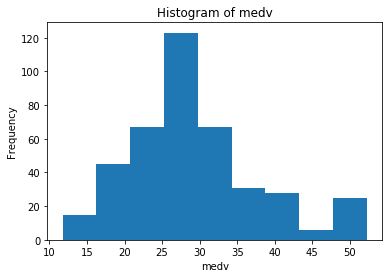

In [32]:
train_df['medv'].hist()

In [33]:
#: Understanding response variable values as historgram in Test data

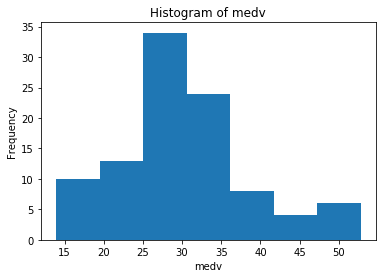

In [34]:
test_df['medv'].hist()

In [35]:
#: Understanding response variable values 

In [36]:
train_df['medv'].levels()

[]

In [37]:
#: Understanding response column as dataframe

In [38]:
type(train_df['medv'])

h2o.frame.H2OFrame

In [39]:
#: Importing H2O H2OGeneralizedLinearEstimator to build GLM Model

In [40]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

In [41]:
#: Building linear regression model (GLM) only with training dataframe

In [42]:
glm_model_with_training_only = H2OGeneralizedLinearEstimator()
glm_model_with_training_only.train(x= features, y = response, training_frame= train_df)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [43]:
glm_model_with_training_only

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1510608322538_1


ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 21.4904862593
RMSE: 4.63578324119
MAE: 3.17657880157
RMSLE: NaN
R^2: 0.744639059652
Mean Residual Deviance: 21.4904862593
Null degrees of freedom: 406
Residual degrees of freedom: 393
Null deviance: 34252.0194968
Residual deviance: 8746.62790752
AIC: 2433.53337345
Scoring History: 


,timestamp,duration,iterations,negative_log_likelihood,objective
,2017-11-13 13:25:42,0.000 sec,0,34252.0193612,84.1572957


In [44]:
#: Building linear regression model (GLM) with cross validation

In [45]:
glm_model_with_training_and_cv = H2OGeneralizedLinearEstimator(nfolds=5)
glm_model_with_training_and_cv.train(x = features, y = response, training_frame=train_df)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [46]:
glm_model_with_training_and_cv

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1510608322538_2


ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 21.4904862593
RMSE: 4.63578324119
MAE: 3.17657880157
RMSLE: NaN
R^2: 0.744639059652
Mean Residual Deviance: 21.4904862593
Null degrees of freedom: 406
Residual degrees of freedom: 393
Null deviance: 34252.0194968
Residual deviance: 8746.62790752
AIC: 2433.53337345

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 24.1896965253
RMSE: 4.91830219947
MAE: 3.32514566624
RMSLE: NaN
R^2: 0.712565663852
Mean Residual Deviance: 24.1896965253
Null degrees of freedom: 406
Residual degrees of freedom: 393
Null deviance: 34524.8323657
Residual deviance: 9845.20648581
AIC: 2481.68816512
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,3.3278604,0.1967828,3.4553337,2.97561,3.354668,3.0902514,3.7634382
mean_residual_deviance,24.02628,3.4479377,32.349747,21.059847,22.988823,17.967949,25.765028
mse,24.02628,3.4479377,32.349747,21.059847,22.988823,17.967949,25.765028
null_deviance,6904.9663,776.46246,8934.819,6446.707,6284.555,7085.6343,5773.1167
r2,0.7084448,0.0427384,0.6675274,0.7219146,0.7641042,0.7746946,0.6139831
residual_deviance,1969.0413,380.2364,2943.827,1790.087,1471.2847,1527.2756,2112.7322
rmse,4.877248,0.3454945,5.6876836,4.589101,4.7946663,4.2388616,5.0759263
rmsle,0.2389418,0.0435073,0.2213929,0.2430418,0.3196328,0.1716996,NaN


Scoring History: 


,timestamp,duration,iterations,negative_log_likelihood,objective
,2017-11-13 13:25:43,0.000 sec,0,34252.0193612,84.1572957


In [47]:
#: Building linear regression model (GLM) with training and 
#  validation data and for that reason we need to split training dataset

In [48]:
df_house_train, df_house_valid = train_df.split_frame(ratios=[0.9])

In [49]:
#: understanding the row count into original andsplit object

In [50]:
print(train_df.shape)
print(df_house_train.shape)
print(df_house_valid.shape)

(407, 14)
(360, 14)
(47, 14)


In [51]:
#: Building linear regression model (GLM) with training and validation data now

In [52]:
glm_model_with_training_and_validtion = H2OGeneralizedLinearEstimator()
glm_model_with_training_and_validtion.train(x = features, y = response, 
                                            training_frame=df_house_train, 
                                            validation_frame=df_house_valid,
                                           model_id = "glm_model_with_training_and_validtion_python")

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [53]:
glm_model_with_training_and_validtion

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  glm_model_with_training_and_validtion_python


ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 22.6019522379
RMSE: 4.75415105334
MAE: 3.28351898357
RMSLE: NaN
R^2: 0.740130181146
Mean Residual Deviance: 22.6019522379
Null degrees of freedom: 359
Residual degrees of freedom: 346
Null deviance: 31310.6879496
Residual deviance: 8136.70280566
AIC: 2174.12880642

ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 13.4457132926
RMSE: 3.66683968734
MAE: 2.75045922323
RMSLE: 0.174745884194
R^2: 0.785121184372
Mean Residual Deviance: 13.4457132926
Null degrees of freedom: 46
Residual degrees of freedom: 33
Null deviance: 2941.38095168
Residual deviance: 631.948524754
AIC: 285.517258146
Scoring History: 


,timestamp,duration,iterations,negative_log_likelihood,objective
,2017-11-13 13:25:45,0.000 sec,0,31310.6877500,86.9741326


In [54]:
#: Performing predictions with one of the above model

In [55]:
glm_predictions = glm_model_with_training_and_validtion.predict(test_df)

glm prediction progress: |████████████████████████████████████████████████| 100%


In [56]:
glm_predictions

predict
30.2041
25.8809
16.3724
14.3409
11.8526
14.8081
23.1262
22.7758
30.9504
21.0986


In [57]:
#: Understanding/Validating predictions based on prediction results historgram

In [58]:
type(glm_predictions)

h2o.frame.H2OFrame

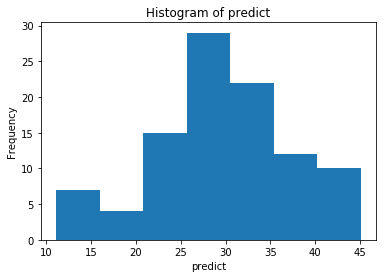

In [59]:
glm_predictions.hist()

In [60]:
#: Understanding/Validating predictions based on prediction results historgram

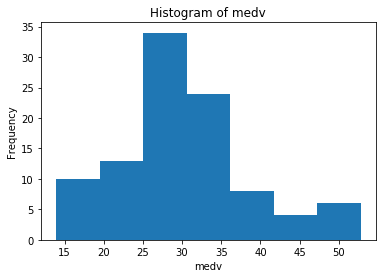

In [61]:
test_df['medv'].hist()

In [62]:
#: Here we can select the best model based on accuracy among all of above models we have created

In [63]:
glm_model_with_training_and_cv.model_performance(train=True)


ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 21.4904862593
RMSE: 4.63578324119
MAE: 3.17657880157
RMSLE: NaN
R^2: 0.744639059652
Mean Residual Deviance: 21.4904862593
Null degrees of freedom: 406
Residual degrees of freedom: 393
Null deviance: 34252.0194968
Residual deviance: 8746.62790752
AIC: 2433.53337345


In [64]:
#: Here we can select the best model based on accuracy among all of above models we have created 
#: R^2 Error

In [65]:
glm_model_with_training_and_cv.model_performance(train=True).r2()

0.7446390596522644

In [66]:
#: RMSE (Root Mean Square) Error

In [67]:
print(glm_model_with_training_and_cv.model_performance(train=True).rmse())
print(glm_model_with_training_and_cv.model_performance(xval=True).rmse())

4.63578324119
4.91830219947


In [68]:
#: R^2 (R^2) Error

In [69]:
print(glm_model_with_training_and_validtion.model_performance(train=True).r2())
print(glm_model_with_training_and_validtion.model_performance(valid=True).r2())

0.740130181146
0.785121184372


In [70]:
#: Getting model ID from an H2O Model

In [71]:
print(glm_model_with_training_and_cv.model_id)
print(glm_model_with_training_and_validtion.model_id)

GLM_model_python_1510608322538_2
glm_model_with_training_and_validtion_python


In [72]:
#: Because we have built the GLM mode, getting coefficients from the model

In [73]:
## Coefiecients
glm_model_with_training_and_cv.coef()

{u'Intercept': 31.528774231266553,
 u'age': 0.005107208303136503,
 u'b': 0.008718851592563063,
 u'chas': 3.3815813840582285,
 u'crim': -0.06513622027532852,
 u'dis': -1.289191443293416,
 u'indus': 0.030629518793200836,
 u'lstat': -0.5401944413590716,
 u'nox': -16.378772176815218,
 u'ptratio': -0.9065228645475741,
 u'rad': 0.22532820259966216,
 u'rm': 4.200463242668189,
 u'tax': -0.009918674651036737,
 u'zn': 0.029656025318839863}

In [74]:
#: Because we have built the GLM mode, getting coefficients from the model

In [75]:
# Normalized Coefiecients ? 
# multinomial? Shoule be used for logistics regression? 
glm_model_with_training_and_cv.coef_norm()

{u'Intercept': 22.624815724815765,
 u'age': 0.14207183308078042,
 u'b': 0.8210996362248626,
 u'chas': 0.8569554463085014,
 u'crim': -0.5177020024096166,
 u'dis': -2.598031332587627,
 u'indus': 0.20872431344108822,
 u'lstat': -3.8346757956332094,
 u'nox': -1.8926874909617486,
 u'ptratio': -1.9596915990302253,
 u'rad': 1.9793740059720644,
 u'rm': 2.9020888093871466,
 u'tax': -1.6906124036113404,
 u'zn': 0.6601366722339048}

In [76]:
#: Getting cross validation prediction details from the model with cross-validation 
#: (If cross validation prediction save is not set to TRUE, you will get error message)

In [77]:
glm_model_with_training_and_cv.cross_validation_metrics_summary()

Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,3.3278604,0.1967828,3.4553337,2.97561,3.354668,3.0902514,3.7634382
mean_residual_deviance,24.02628,3.4479377,32.349747,21.059847,22.988823,17.967949,25.765028
mse,24.02628,3.4479377,32.349747,21.059847,22.988823,17.967949,25.765028
null_deviance,6904.9663,776.46246,8934.819,6446.707,6284.555,7085.6343,5773.1167
r2,0.7084448,0.0427384,0.6675274,0.7219146,0.7641042,0.7746946,0.6139831
residual_deviance,1969.0413,380.2364,2943.827,1790.087,1471.2847,1527.2756,2112.7322
rmse,4.877248,0.3454945,5.6876836,4.589101,4.7946663,4.2388616,5.0759263
rmsle,0.2389418,0.0435073,0.2213929,0.2430418,0.3196328,0.1716996,NaN


In [78]:
#: Getting variable importance from a GLM mode (It will plot the coefficient table)

In [79]:
glm_model_with_training_and_validtion.varimp()

In [80]:
#: Getting variable importance PLOT for GLM (Error)

In [81]:
# - Positive ?
# - Negative ?
glm_model_with_training_and_validtion.variable_importancesvarimp_plot()

AttributeError: type object 'H2OGeneralizedLinearEstimator' has no attribute 'variable_importancesvarimp_plot'

In [82]:
#: Building a GLM model with cross validation and saving cross validation predictions

In [83]:
glm_model_with_training_and_cv = H2OGeneralizedLinearEstimator(keep_cross_validation_predictions = True, nfolds=5)
glm_model_with_training_and_cv.train(x = features, y = response, training_frame= train_df)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [84]:
#: Looking at cross validation predictions for all CV models

In [85]:
len(glm_model_with_training_and_cv.cross_validation_predictions())

5

In [86]:
glm_model_with_training_and_cv.cross_validation_predictions()[0]
glm_model_with_training_and_cv.cross_validation_predictions()[1]

predict
25.9432
0
0
28.7104
0
0
0
0
19.7854
0


In [87]:
#: Accessing H2O Model details from JSON

In [88]:
glm_model_with_training_and_validtion._model_json

Coefficients: glm coefficients



names,coefficients,standardized_coefficients
Intercept,34.1756448,22.6358333
crim,-0.0776533,-0.6431659
zn,0.0372262,0.8327128
indus,0.0246784,0.1677198
chas,3.0631472,0.8079294
nox,-19.5370912,-2.2726183
rm,4.0019148,2.7806073
age,0.0122496,0.3394261
dis,-1.4033012,-2.8524106
rad,0.2560373,2.2732963


GLM Model: summary



,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,gaussian,identity,"Elastic Net (alpha = 0.5, lambda = 0.01383 )",13,13,1,py_17_sid_9612


Scoring History: 


,timestamp,duration,iterations,negative_log_likelihood,objective
,2017-11-13 13:25:45,0.000 sec,0,31310.6877500,86.9741326


Standardized Coefficient Magnitudes: standardized coefficient magnitudes



names,coefficients,sign
lstat,3.9971237,NEG
dis,2.8524106,NEG
rm,2.7806073,POS
rad,2.2732963,POS
nox,2.2726183,NEG
ptratio,1.8722114,NEG
tax,1.8333956,NEG
zn,0.8327128,POS
b,0.8224249,POS
chas,0.8079294,POS



ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 22.6019522379
RMSE: 4.75415105334
MAE: 3.28351898357
RMSLE: NaN
R^2: 0.740130181146
Mean Residual Deviance: 22.6019522379
Null degrees of freedom: 359
Residual degrees of freedom: 346
Null deviance: 31310.6879496
Residual deviance: 8136.70280566
AIC: 2174.12880642

ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 13.4457132926
RMSE: 3.66683968734
MAE: 2.75045922323
RMSLE: 0.174745884194
R^2: 0.785121184372
Mean Residual Deviance: 13.4457132926
Null degrees of freedom: 46
Residual degrees of freedom: 33
Null deviance: 2941.38095168
Residual deviance: 631.948524754
AIC: 285.517258146


{u'__meta': {u'schema_name': u'GLMModelV3',
  u'schema_type': u'GLMModel',
  u'schema_version': 3},
 u'algo': u'glm',
 u'algo_full_name': u'Generalized Linear Modeling',
 u'compatible_frames': None,
 u'data_frame': {u'URL': u'/3/Frames/py_17_sid_9612',
  u'__meta': {u'schema_name': u'FrameKeyV3',
   u'schema_type': u'Key<Frame>',
   u'schema_version': 3},
  u'name': u'py_17_sid_9612',
  u'type': u'Key<Frame>'},
 u'model_id': {u'URL': u'/3/Models/glm_model_with_training_and_validtion_python',
  u'__meta': {u'schema_name': u'ModelKeyV3',
   u'schema_type': u'Key<Model>',
   u'schema_version': 3},
  u'name': u'glm_model_with_training_and_validtion_python',
  u'type': u'Key<Model>'},
 u'output': {u'__meta': {u'schema_name': u'GLMModelOutputV3',
   u'schema_type': u'GLMOutput',
   u'schema_version': 3},
  u'coefficients_table': ,
  u'cross_validation_fold_assignment_frame_id': None,
  u'cross_validation_holdout_predictions_frame_id': None,
  u'cross_validation_metrics': None,
  u'cross_vali

In [89]:
glm_model_with_training_and_validtion._model_json['output']['coefficients_table']

Coefficients: glm coefficients



names,coefficients,standardized_coefficients
Intercept,34.1756448,22.6358333
crim,-0.0776533,-0.6431659
zn,0.0372262,0.8327128
indus,0.0246784,0.1677198
chas,3.0631472,0.8079294
nox,-19.5370912,-2.2726183
rm,4.0019148,2.7806073
age,0.0122496,0.3394261
dis,-1.4033012,-2.8524106
rad,0.2560373,2.2732963


In [90]:
glm_model_with_training_and_validtion._model_json['output']['names']

[u'crim',
 u'zn',
 u'indus',
 u'chas',
 u'nox',
 u'rm',
 u'age',
 u'dis',
 u'rad',
 u'tax',
 u'ptratio',
 u'b',
 u'lstat',
 u'medv']

In [91]:
glm_model_with_training_and_validtion._model_json['output']['cross_validation_predictions']

In [92]:
glm_model_with_training_and_cv._model_json['output']['cross_validation_predictions']

[{u'URL': u'/3/Frames/prediction_GLM_model_python_1510608322538_3_cv_1',
  u'__meta': {u'schema_name': u'FrameKeyV3',
   u'schema_type': u'Key<Frame>',
   u'schema_version': 3},
  u'name': u'prediction_GLM_model_python_1510608322538_3_cv_1',
  u'type': u'Key<Frame>'},
 {u'URL': u'/3/Frames/prediction_GLM_model_python_1510608322538_3_cv_2',
  u'__meta': {u'schema_name': u'FrameKeyV3',
   u'schema_type': u'Key<Frame>',
   u'schema_version': 3},
  u'name': u'prediction_GLM_model_python_1510608322538_3_cv_2',
  u'type': u'Key<Frame>'},
 {u'URL': u'/3/Frames/prediction_GLM_model_python_1510608322538_3_cv_3',
  u'__meta': {u'schema_name': u'FrameKeyV3',
   u'schema_type': u'Key<Frame>',
   u'schema_version': 3},
  u'name': u'prediction_GLM_model_python_1510608322538_3_cv_3',
  u'type': u'Key<Frame>'},
 {u'URL': u'/3/Frames/prediction_GLM_model_python_1510608322538_3_cv_4',
  u'__meta': {u'schema_name': u'FrameKeyV3',
   u'schema_type': u'Key<Frame>',
   u'schema_version': 3},
  u'name': u'pr

In [93]:
glm_model_with_training_and_cv._model_json['output']['training_metrics']


ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 21.4904862593
RMSE: 4.63578324119
MAE: 3.17657880157
RMSLE: NaN
R^2: 0.744639059652
Mean Residual Deviance: 21.4904862593
Null degrees of freedom: 406
Residual degrees of freedom: 393
Null deviance: 34252.0194968
Residual deviance: 8746.62790752
AIC: 2433.53337345


In [94]:
glm_model_with_training_and_cv._model_json['output']['training_metrics']['MSE']

21.490486259273535

In [95]:
glm_model_with_training_and_cv._model_json['output']['training_metrics']['R^2']

In [96]:
#: List of H2O objects (all in memory)

In [97]:
h2o.ls()

,key
0,GLM_model_python_1510608322538_1
1,GLM_model_python_1510608322538_2
2,GLM_model_python_1510608322538_2_cv_1
3,GLM_model_python_1510608322538_2_cv_2
4,GLM_model_python_1510608322538_2_cv_3
5,GLM_model_python_1510608322538_2_cv_4
6,GLM_model_python_1510608322538_2_cv_5
7,GLM_model_python_1510608322538_3
8,GLM_model_python_1510608322538_3_cv_1
9,GLM_model_python_1510608322538_3_cv_2


In [101]:
#: Getting the model object in Python,by passing the H2O model ID

In [98]:
## Try below after the exercise from R
glm_model_from_R = h2o.get_model("glm_model_with_training_and_validtion_in_R")
glm_model_from_R
print(glm_model_from_R.r2())

In [103]:
#: Getting the model object in Python,by passing the H2O model ID

In [104]:
glm_model_with_training_and_validtion.model_id

u'glm_model_with_training_and_validtion_python'

In [105]:
#: Finding the type of an H2O Object

In [106]:
type(glm_model_with_training_and_cv)

h2o.estimators.glm.H2OGeneralizedLinearEstimator